In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving math_6th.csv to math_6th.csv
Saving reading_6th.csv to reading_6th.csv


In [ ]:
math=pd.read_csv('math_6th.csv')

In [ ]:
math.shape

(45, 12)

In [ ]:
import pandas as pd
math=pd.get_dummies(math,columns=['Ethnicity'])

In [ ]:
math_analysis=math.iloc[:,2:]
math_analysis.head()
x_math=math_analysis.drop('Math 2019 STAAR Percent Score',axis=1)
y_math=math_analysis['Math 2019 STAAR Percent Score']
x_math.shape

(45, 11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(x_math, y_math, test_size=0.2, random_state=42)


In [ ]:
X_train_math.shape
X_test_math.shape

(9, 11)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_math, y_train_math)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train_math.head()


ECD  LEP  SpEd  ...  Ethnicity_B  Ethnicity_H  Ethnicity_W
3     1    0     0  ...            1            0            0
6     1    0     1  ...            1            0            0
24    1    0     0  ...            1            0            0
32    1    1     0  ...            0            1            0
19    1    1     0  ...            0            1            0

[5 rows x 11 columns]

In [ ]:
regressor.predict(X_test_math)
#regressor.coef_

array([17.5098878 , 19.04189505, 46.06540591, 34.77001431, 31.62968282,
       37.90890888, 36.50609059, 33.32171147, 50.00515763])

In [ ]:
import numpy as np
Rss_math=sum(np.square(y_test_math-regressor.predict(X_test_math)))
abs(y_test_math-regressor.predict(X_test_math))
#y_test_math-regressor.predict(X_test_math)
Rss_math
regressor.score(X_test_math,y_test_math)

0.3618268467852406

In [ ]:
 pd.DataFrame({'Actual': y_test_math, 'Predicted': regressor.predict(X_test_math)})

Actual  Predicted
39    16.0  17.509888
25    18.0  19.041895
26    39.0  46.065406
43    42.0  34.770014
35    32.0  31.629683
41    55.0  37.908909
4     29.0  36.506091
12    39.0  33.321711
8     34.0  50.005158

In [ ]:
#Saving the model
import pickle
final_model= pickle.dump(regressor,open("test",'wb'))

In [ ]:
#Testing the loaded model
loaded_model=pickle.load(open("test",'rb'))
loaded_model.score(X_test_math,y_test_math)

0.3618268467852406

In [ ]:
#Randomforest
from sklearn.ensemble import RandomForestRegressor
RandomForestRegModel= RandomForestRegressor()
RandomForestRegModel.fit(X_train_math,y_train_math)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred_randomforest=RandomForestRegModel.predict(X_test_math)
RandomForestRegModel.score(X_test_math,y_test_math)

0.2689746562261266

In [ ]:
pd.DataFrame({'Actual': y_test_math, 'Predicted': pred_randomforest})

Actual  Predicted
39    16.0      23.87
25    18.0      24.34
26    39.0      46.00
43    42.0      41.42
35    32.0      29.72
41    55.0      37.58
4     29.0      40.71
12    39.0      40.08
8     34.0      49.88

In [ ]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X_train_math)
X_poly[30].shape

(78,)

In [ ]:
poly_reg=LinearRegression()
poly_fit=poly_reg.fit(X_poly,y_train_math)
test_poly=pre_process.fit_transform(X_test_math)
poly_predict=poly_fit.predict(test_poly)
poly_fit.score(test_poly,y_test_math)

-139.9219472580671

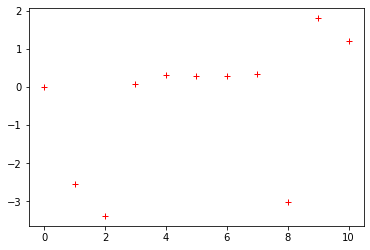

In [ ]:
import matplotlib.pyplot as plt
regressor1.predict(X_test_math).shape
plt.plot(regressor.coef_,'r+')

Reading

In [ ]:
reading=pd.read_csv('reading_6th.csv')
import pandas as pd
reading=pd.get_dummies(reading,columns=['Ethnicity'])

In [ ]:
reading.head()

LocalId  Grade  ECD  ...  Ethnicity_B  Ethnicity_H  Ethnicity_W
0     9712      8    1  ...            1            0            0
1     9867      8    1  ...            1            0            0
2     9868      8    1  ...            0            1            0
3     9866      8    1  ...            1            0            0
4     3202      8    1  ...            1            0            0

[5 rows x 14 columns]

In [ ]:
reading_analysis=reading.iloc[:,2:]
reading_analysis.head()
x_reading=reading_analysis.drop('Reading 2019 STAAR Percent Score',axis=1)
y_reading=reading_analysis['Reading 2019 STAAR Percent Score']
x_reading.shape

(45, 11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_reading, X_test_reading, y_train_reading, y_test_reading = train_test_split(x_reading, y_reading, test_size=0.33, random_state=42)

In [ ]:
y_train_reading

13    65.0
42    25.0
15    75.0
9     53.0
16    73.0
37    38.0
31    43.0
27    38.0
0     23.0
30    28.0
29    25.0
5     13.0
11    25.0
33    28.0
1     33.0
40    68.0
21    83.0
2     53.0
34    33.0
23    40.0
36    83.0
10    55.0
22    20.0
18    35.0
44    58.0
20    33.0
7     43.0
14    65.0
28    30.0
38    30.0
Name: Reading 2019 STAAR Percent Score, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train_reading, y_train_reading)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import numpy as np
Rss_reading=sum(np.square(y_test_reading-regressor1.predict(X_test_reading)))
Rss_reading

2187.657885814406

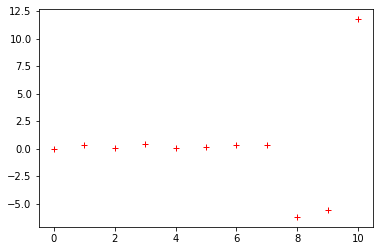

In [ ]:
#Extract important features

import matplotlib.pyplot as plt
regressor1.predict(X_test_reading).shape
plt.plot(regressor1.coef_,'r+')

#9,10&11th features are quite important in deciding the important features

In [ ]:
plt.plot()